In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-26/plastics.csv')

In [ ]:
data.head()

,country,year,parent_company,empty,hdpe,ldpe,o,pet,pp,ps,pvc,grand_total,num_events,volunteers
0,Argentina,2019,Grand Total,0.0,215.0,55.0,607.0,1376.0,281.0,116.0,18.0,2668.0,4,243.0
1,Argentina,2019,Unbranded,0.0,155.0,50.0,532.0,848.0,122.0,114.0,17.0,1838.0,4,243.0
2,Argentina,2019,The Coca-Cola Company,0.0,0.0,0.0,0.0,222.0,35.0,0.0,0.0,257.0,4,243.0
3,Argentina,2019,Secco,0.0,0.0,0.0,0.0,39.0,4.0,0.0,0.0,43.0,4,243.0
4,Argentina,2019,Doble Cola,0.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,38.0,4,243.0


In [ ]:
data.loc[data.country=='EMPTY','country'] = 'OTHER'

In [ ]:
data.isna().sum()

country              0
year                 0
parent_company      51
empty             3243
hdpe              1646
ldpe              2077
o                  267
pet                214
pp                1496
ps                1972
pvc               4328
grand_total         14
num_events           0
volunteers         107
dtype: int64

In [ ]:
data.value_counts(['country','year']).sort_values(ascending=False)

country               year
OTHER                 2019    1346
Philippines           2019     711
Vietnam               2019     678
Indonesia             2019     636
China                 2019     622
                              ... 
Honduras              2020       2
Luxembourg            2019       2
Benin                 2019       2
                      2020       2
United Arab Emirates  2020       1
Length: 107, dtype: int64

In [ ]:
data_country = data.groupby(['country'],as_index=False).sum()[['country','grand_total','volunteers','num_events']]
data_country.head()

,country,grand_total,volunteers,num_events
0,Argentina,6422.0,68859.0,6524
1,Armenia,8.0,12.0,4
2,Australia,1674.0,13120.0,623
3,Bangladesh,2415.0,20634.0,168
4,Benin,10318.0,5572.0,6


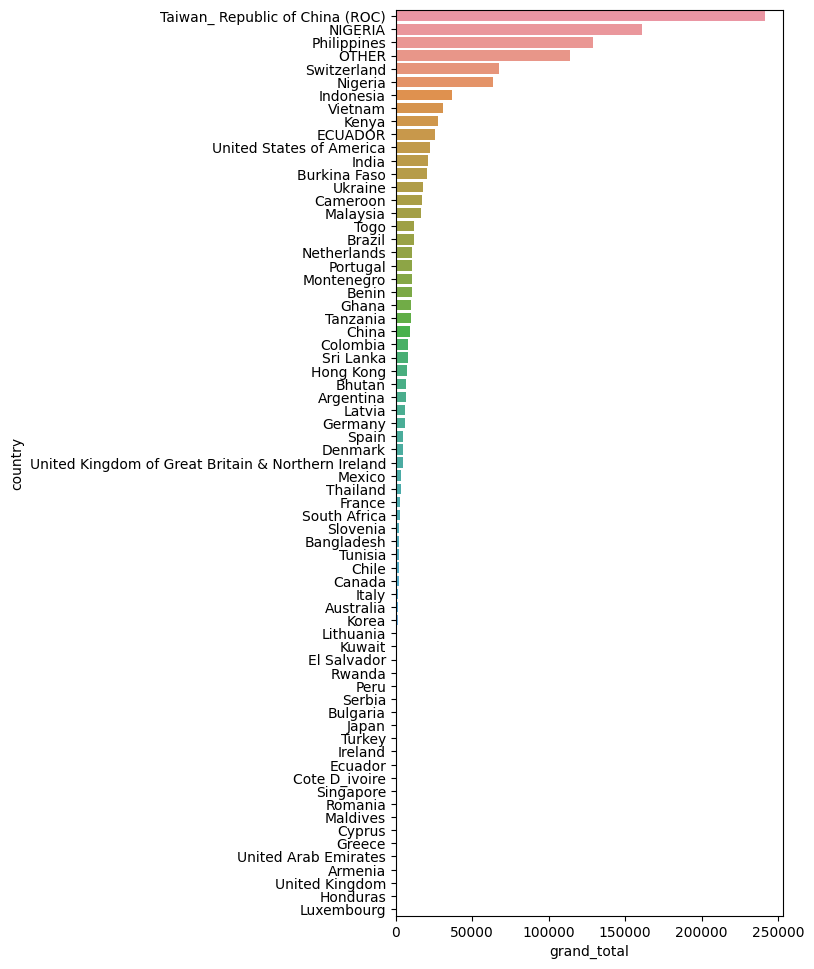

In [ ]:
data_country = data_country.sort_values('grand_total', ascending=False)
plt.figure(figsize=(5,12),dpi=100)
sns.barplot(data=data_country,y='country',x='grand_total')
plt.show()

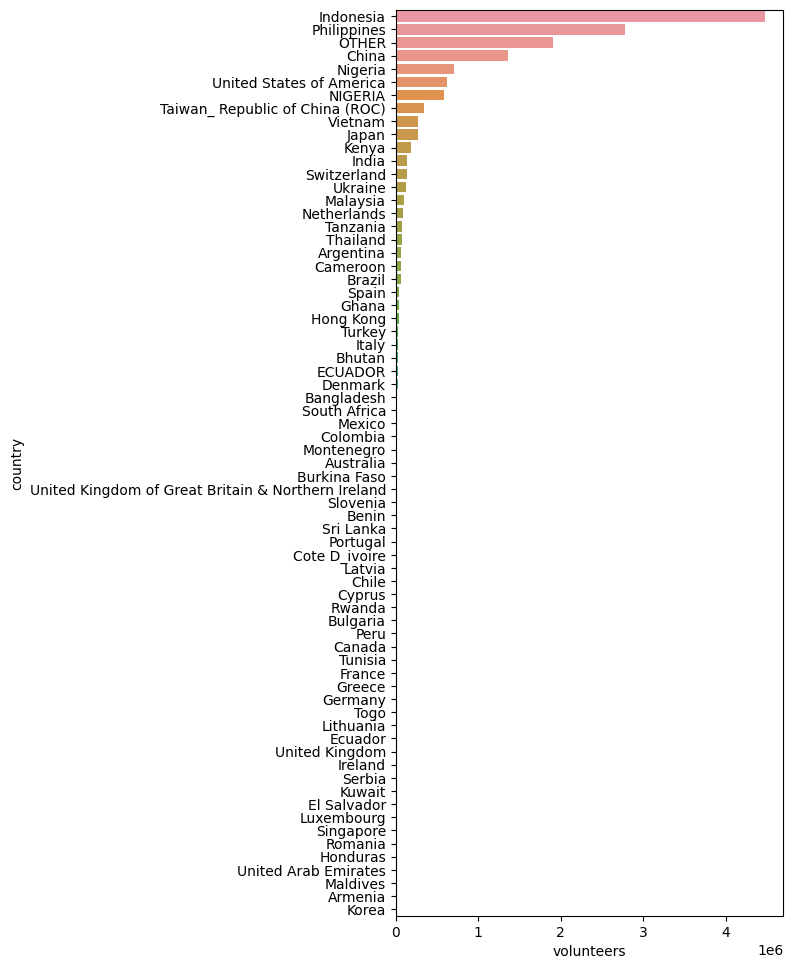

In [ ]:
data_country = data_country.sort_values('volunteers', ascending=False)
plt.figure(figsize=(5,12),dpi=100)
sns.barplot(data=data_country,y='country',x='volunteers')
plt.show()

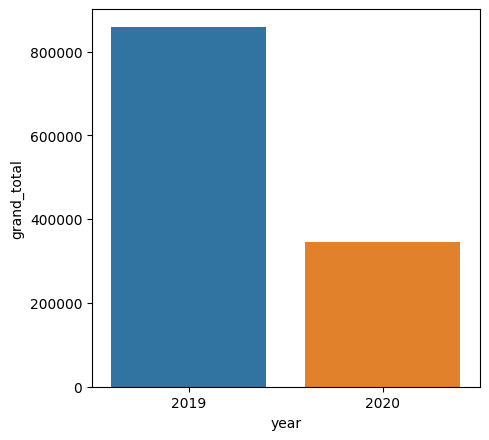

In [ ]:
data_year = data.groupby('year',as_index=False).sum()
plt.figure(figsize=(5,5),dpi=100)
sns.barplot(data=data_year,x='year',y='grand_total')
plt.show()

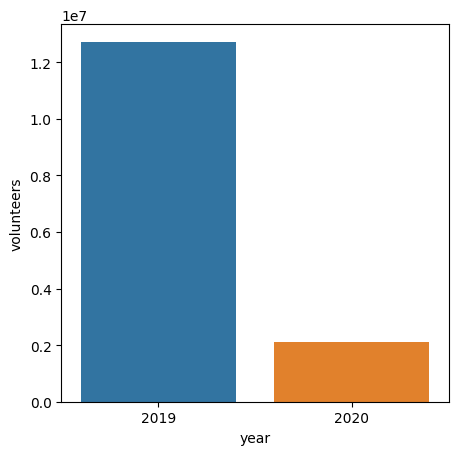

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
sns.barplot(data=data_year,x='year',y='volunteers')
plt.show()

In [ ]:
data_company = data.groupby('parent_company', as_index=False).sum().sort_values('grand_total', ascending=False).reset_index(drop=True)
x = data_company.grand_total[20]
data_company.loc[(data_company.grand_total<x)|(data_company.parent_company=='Unbranded'),'parent_company'] = 'OTHER'
data_company = data_company.groupby('parent_company', as_index=False).sum().sort_values('grand_total', ascending=False).reset_index(drop=True)

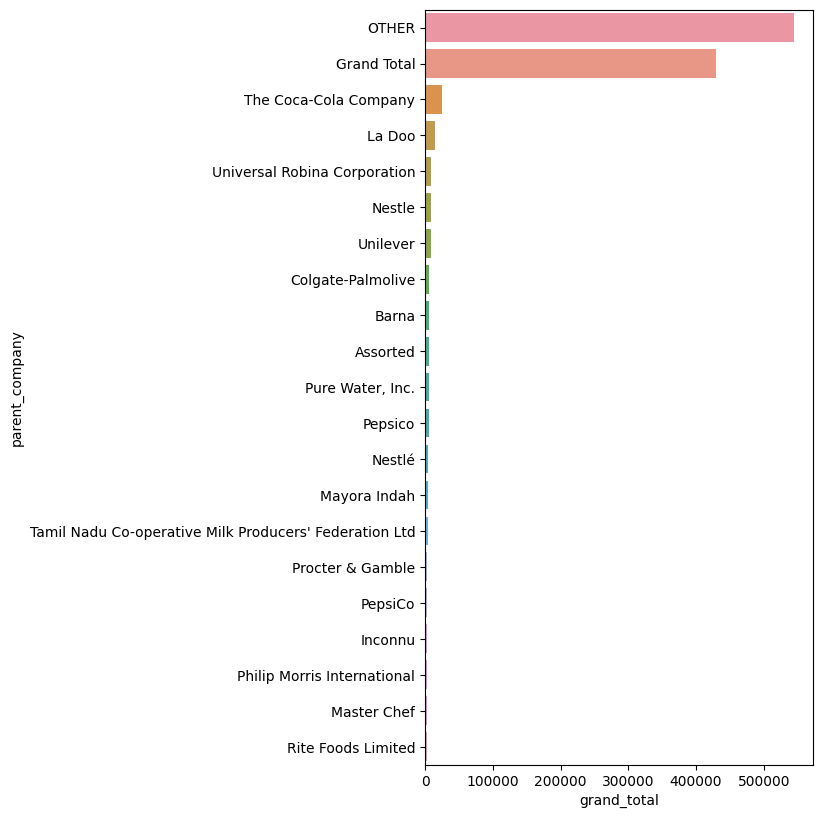

In [ ]:
plt.figure(figsize=(5,10), dpi=100)
sns.barplot(data=data_company, y='parent_company', x='grand_total')
plt.show()

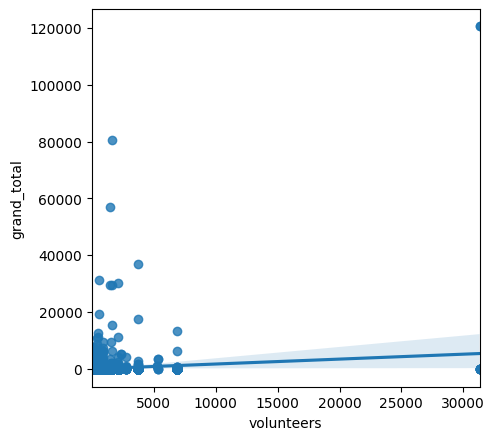

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
sns.regplot(data=data, x='volunteers',y='grand_total')
plt.show()

In [ ]:
model = ols("grand_total ~ volunteers", data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            grand_total   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     380.4
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.54e-83
Time:                        15:01:06   Log-Likelihood:            -1.1859e+05
No. Observations:               13259   AIC:                         2.372e+05
Df Residuals:                   13257   BIC:                         2.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.0924     18.928     -5.447      0.000    -140.194     -65.990
volunteers     0.1733      0.009     19.503      0.000       0.156       0.191
==============================================================================
Omnibus:                    40724.231   Durbin-Watson:                   1.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3792156988.271
Skew:                          46.760   Prob(JB):                         0.00
Kurtosis:                    2621.283   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data_materials = data.rename(columns={'o':'other'}, inplace=True)
data_materials = data.drop(['grand_total','volunteers','num_events'], axis=1).melt(id_vars=['country','year','parent_company'])
data_materials.country = data_materials.country.str.lower()

In [ ]:
data_materials.head()

,country,year,parent_company,variable,value
0,argentina,2019,Grand Total,empty,0.0
1,argentina,2019,Unbranded,empty,0.0
2,argentina,2019,The Coca-Cola Company,empty,0.0
3,argentina,2019,Secco,empty,0.0
4,argentina,2019,Doble Cola,empty,0.0


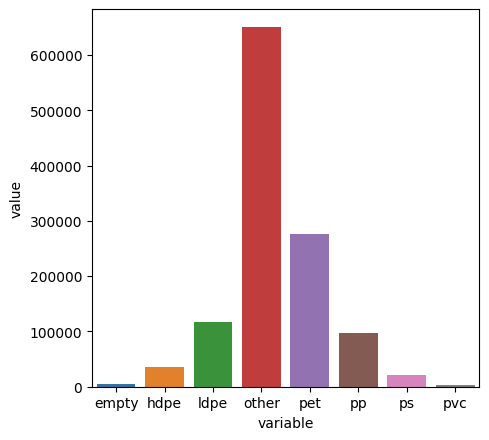

In [ ]:
plt.figure(figsize=(5,5), dpi=100)
sns.barplot(data=data_materials.groupby('variable',as_index=False).sum(), x='variable',y='value')
plt.show()

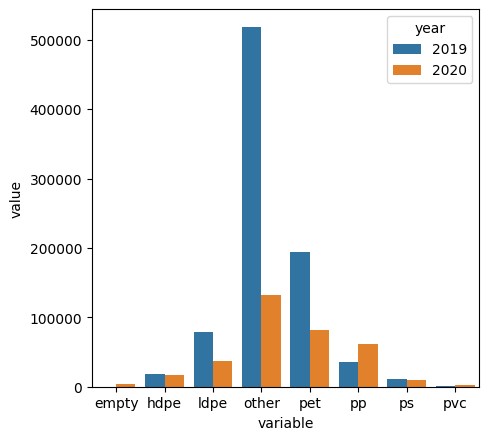

In [ ]:
plt.figure(figsize=(5,5), dpi=100)
sns.barplot(data=data_materials.groupby(['year','variable'],as_index=False).sum(), x='variable',y='value',hue='year')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


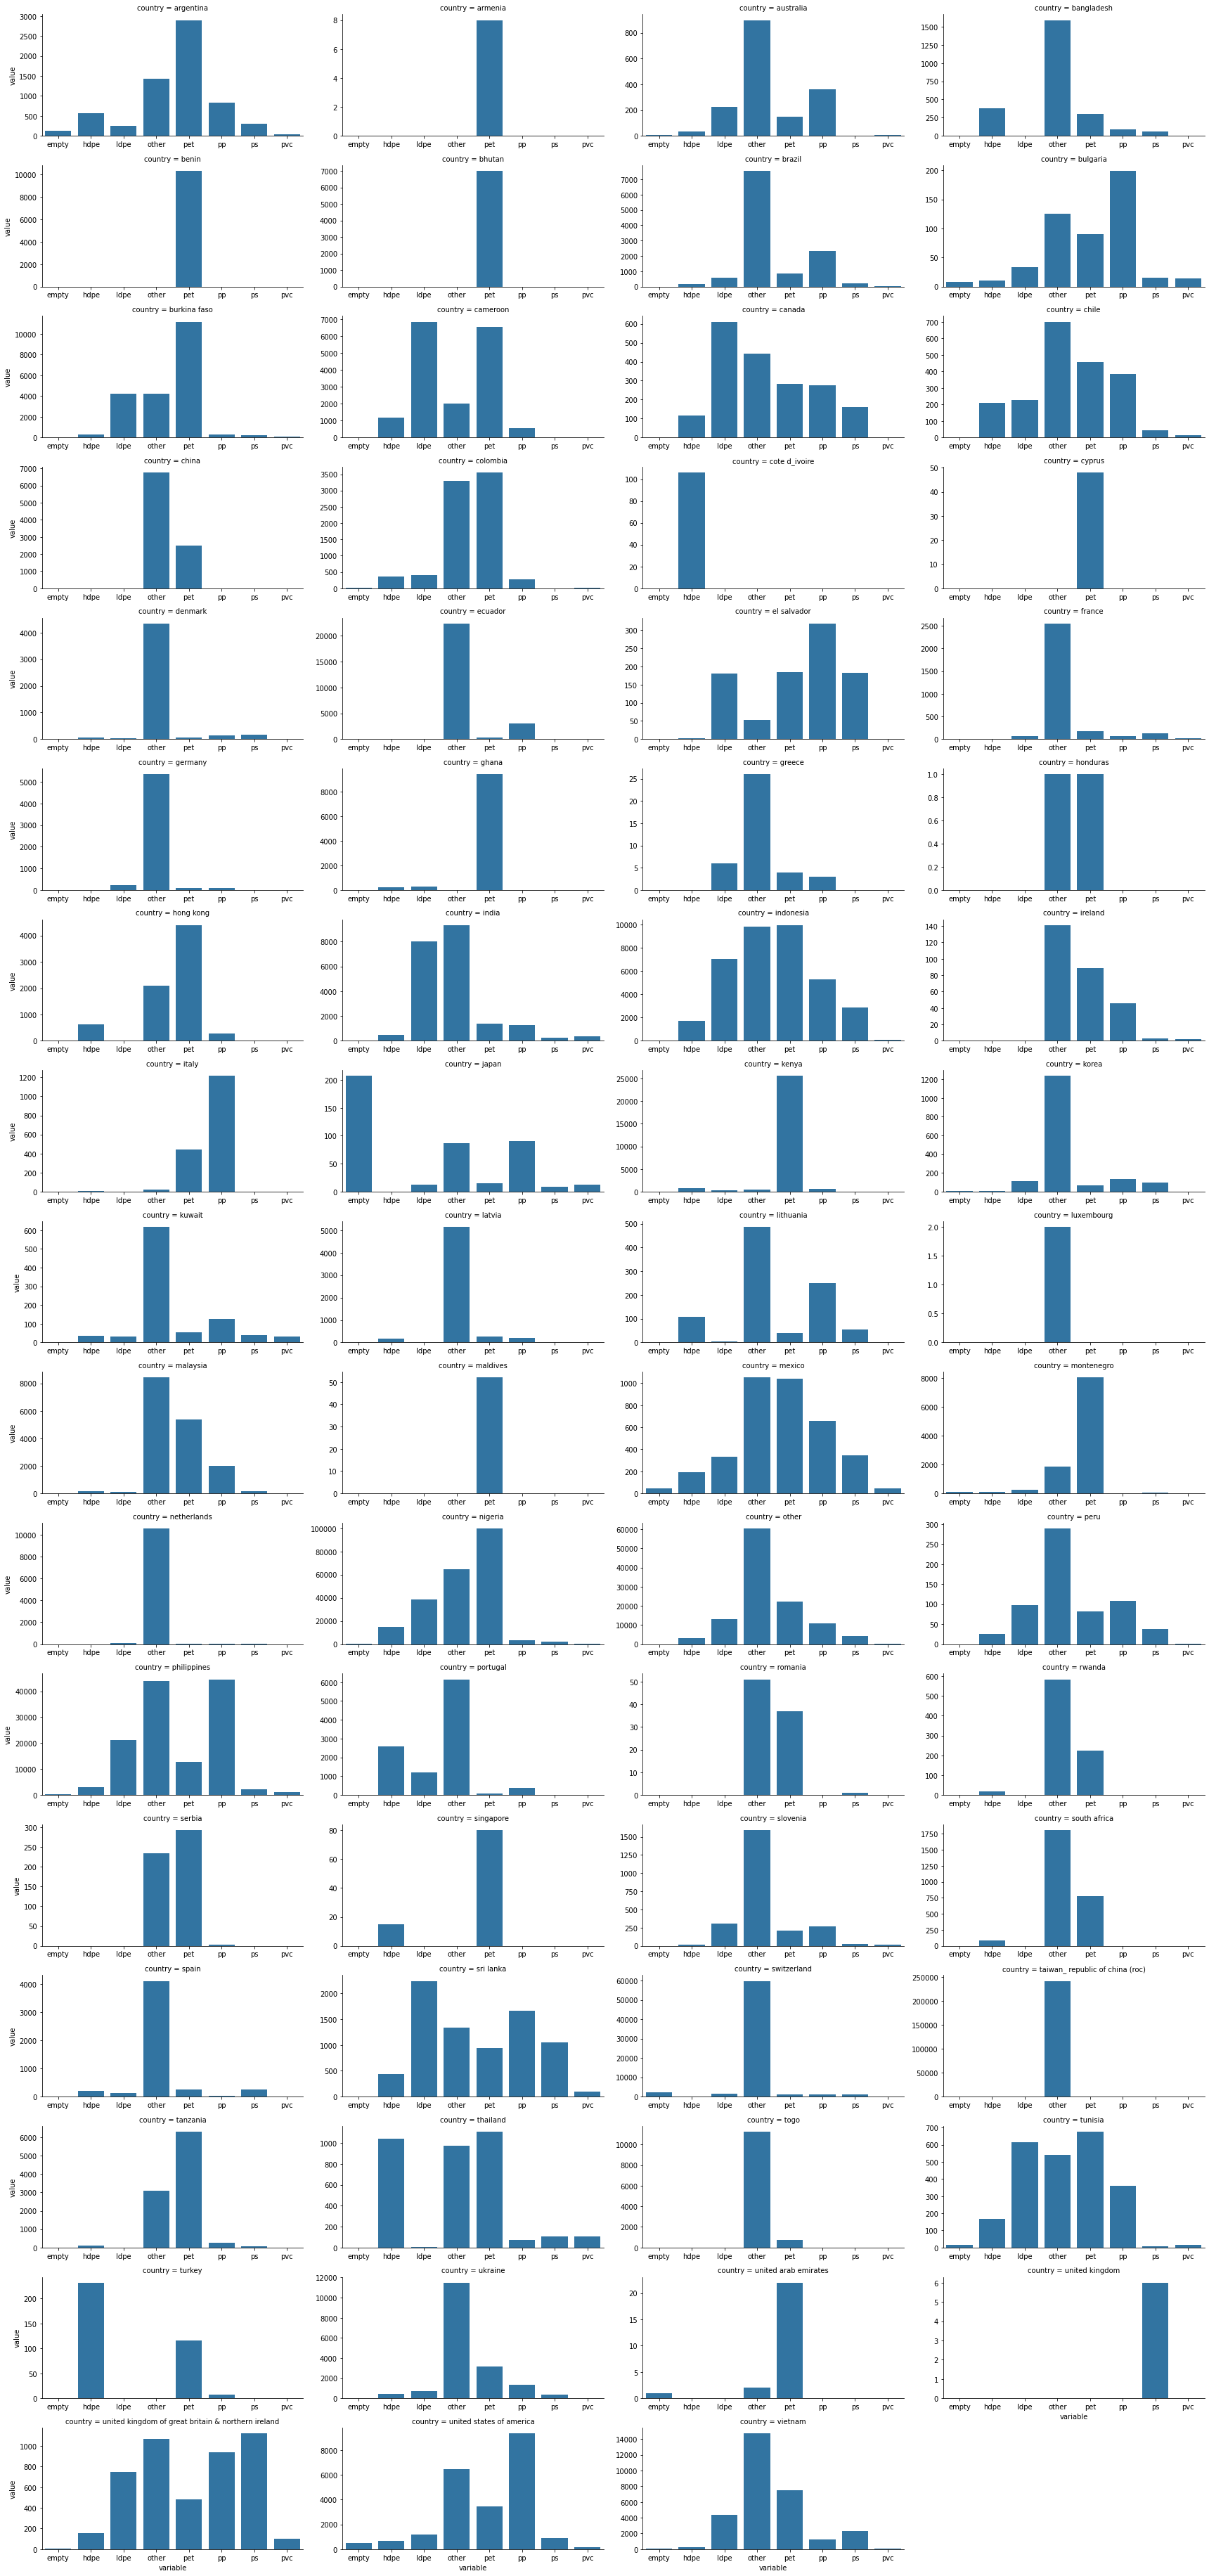

In [ ]:
g = sns.FacetGrid(data=data_materials.groupby(['country','variable'], as_index=False).sum(), col='country', col_wrap=4, height=3, aspect=2, sharex=False, sharey=False)
g.map(sns.barplot, 'variable','value')
plt.show()

In [ ]:
b = data_materials.groupby(['country','variable'], as_index=False).sum().pivot(index='country',columns='variable', values='value')

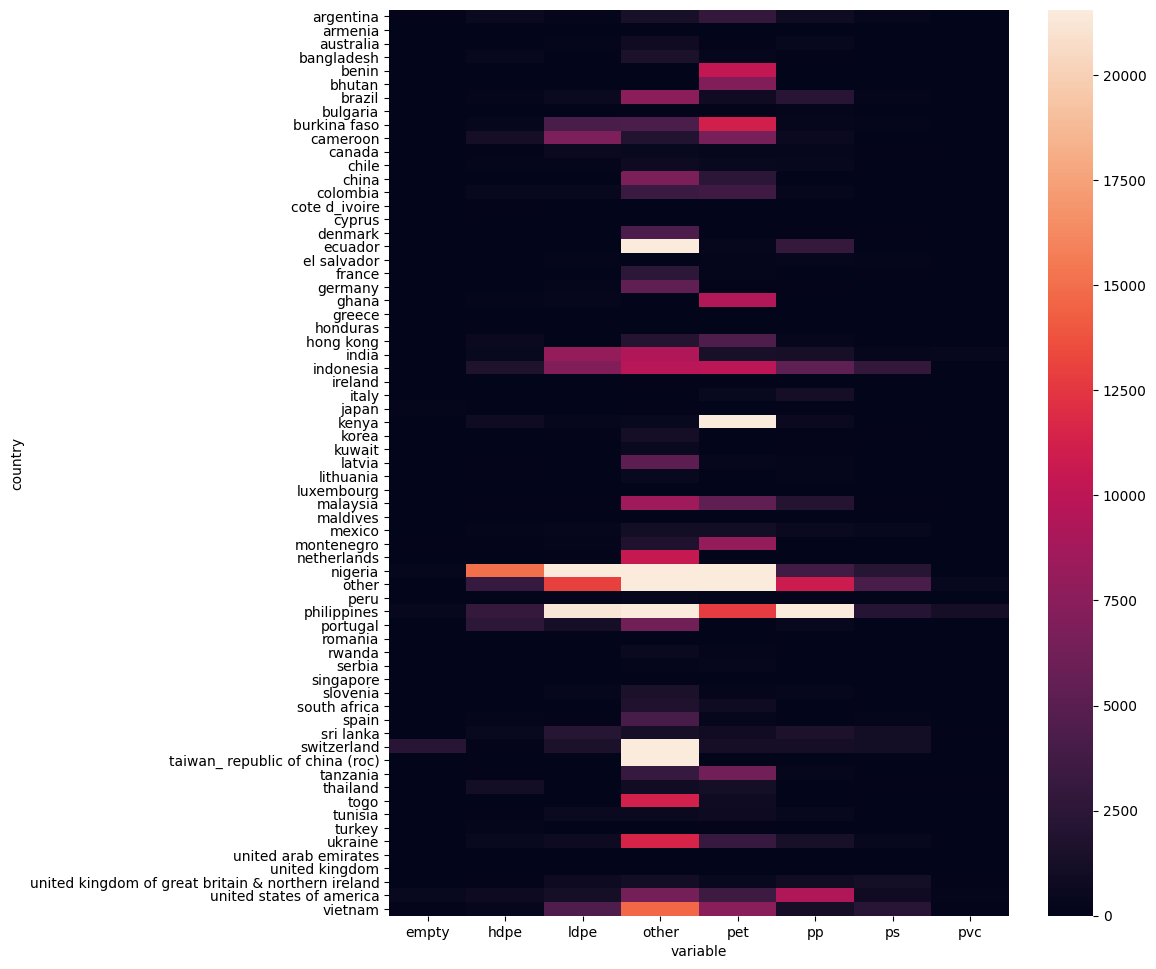

In [ ]:
plt.figure(figsize=(10,12), dpi=100)
sns.heatmap(b, robust=True, xticklabels=True, yticklabels=True)
plt.show()

In [ ]:
b

variable,empty,hdpe,ldpe,other,pet,pp,ps,pvc
country,,,,,,,,
argentina,128.0,562.0,251.0,1426.0,2896.0,825.0,294.0,40.0
armenia,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0
australia,4.0,33.0,222.0,898.0,147.0,361.0,3.0,6.0
bangladesh,0.0,376.0,2.0,1591.0,299.0,89.0,58.0,0.0
benin,0.0,0.0,0.0,0.0,10318.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
united arab emirates,1.0,0.0,0.0,2.0,22.0,0.0,0.0,0.0
united kingdom,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
united kingdom of great britain & northern ireland,3.0,153.0,752.0,1069.0,480.0,942.0,1122.0,101.0


In [2]:
max(Anan)

NameError: ignored